In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import os
os.chdir('/home/meg/Credit_Risk_Modelling')
os.getcwd()


'/home/meg/Credit_Risk_Modelling'

In [3]:
train = pd.read_csv('data/cs-training.csv').drop(['Unnamed: 0'],axis=1)
test = pd.read_csv('data/cs-test.csv').drop(['Unnamed: 0'],axis=1)

In [4]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
#find duplicates
train.duplicated().value_counts()

False    149391
True        609
dtype: int64

In [6]:
#609 rows have duplicates, delete them. Create a new df train_redup.
train_redup = train.drop_duplicates()
train_redup.duplicated().value_counts()
train_redup.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
#check null values
train_redup.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [8]:
#function to get a percentage of missing values.
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)


In [9]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

It could be possible that these customers don't have dependants. 
Others might not be intersted in revealing monthly income, cause they don't have a fixed income or they could be taking the loan against sth else.

How does this affect our analsysis? How does monthly income and number of dependants relate????

In [10]:
train_redup['NumberOfDependents'].mode()

0    0.0
Name: NumberOfDependents, dtype: float64

This means most rows have no dependants. Let's break it down further. 

In [11]:
train_redup.groupby(['NumberOfDependents']).size()

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

We can fill in the missing values with the mode, so let the missing values of number of dependants to zero.

In [12]:
#new df where number of dependants;
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()] # have null values.
fam_nmiss =train_redup[train_redup.NumberOfDependents.notnull()] #have no mull values.

In [13]:
fam_miss.shape

(3828, 11)

In [14]:
fam_nmiss.shape

(145563, 11)

In [15]:
#fill with mode=0
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

/tmp/ipykernel_14658/6310363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
/tmp/ipykernel_14658/6310363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [16]:
findMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

Do the same for monthly income.

In [17]:
#Evaluate monthly income.
findMiss(fam_nmiss)


SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [18]:
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [19]:
fam_nmiss['MonthlyIncome'].agg(['max'])

max    3008750.0
Name: MonthlyIncome, dtype: float64

In [20]:
#fill missing values in monthly income.
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

/tmp/ipykernel_14658/2283562481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [21]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [22]:
filled_train = fam_nmiss.append(fam_miss)

/tmp/ipykernel_14658/3665105726.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filled_train = fam_nmiss.append(fam_miss)


In [23]:
filled_train.shape
findMiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [24]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [25]:
#percentage of defaulter and not defulter
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

Highly imbalanced data. (biased data) 6% are defaulters, 93% non-defaulters.

In [26]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [27]:
#divide into quantiles
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

Outliers since the percentage is more than one, we need to drop the extra

In [28]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [29]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10]).groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    224
1     17
dtype: int64

In [30]:
#let's drop the outliers
util_dropped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].index)
filled_train.shape

(149391, 11)

In [31]:
util_dropped.shape

(149150, 11)

<AxesSubplot: >

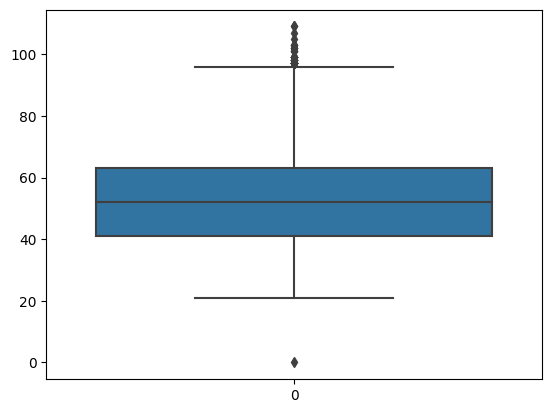

In [32]:
#let's see other variables we have. Look at age, do we have outliers? We can create a boxplot to check. 
sns.boxplot(util_dropped['age'])

We can see some outliers in age, where age=0, not so many so can be removed or we can let it be, and remove if it affects the model.
We also see others above 100, which could be possible.

Next variable is NumberOfTime30-59DaysPastDueNotWorse= meaning the number of times borrower has been 30-59 days past due but no worse in the past two years.

In [33]:
util_dropped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

There seems to be outliers after 13. Check other similar attributes for patterns.

In [34]:
util_dropped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [35]:
util_dropped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

We see common in all three variables the 11-17 is the nearest number to 96. Nothing significant yet, do further analysis on one.

In [36]:
util_dropped[util_dropped['NumberOfTimes90DaysLate']>=96].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1733,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2286,0,1.0,22,98,0.0,5400.0,0,98,0,98,0.0
3884,0,1.0,38,98,12.0,5400.0,0,98,0,98,0.0
4417,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4705,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0


In [37]:
#describe this with an extra variable
util_dropped[util_dropped['NumberOfTimes90DaysLate']>=96]['SeriousDlqin2yrs'].describe()

count    225.000000
mean       0.604444
std        0.490060
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: SeriousDlqin2yrs, dtype: float64

Count of 225 looks okay, more than half are defaulters, which is true, ana average of 60%. Confirm if this hypothesis is true.

In [38]:
util_dropped[util_dropped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

136 defaulters, it won't be a good idea to delete >96. We can figure out another way to treat this outliers. Try outlier treatment using winsorizing(try to bring them closerst to the lower amount.)

Look at the next variable.

DebtRatio= what is the total asset that you have and the amount you owe?(layman term)- liabilities/assets. 

In [39]:
util_dropped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<AxesSubplot: xlabel='DebtRatio', ylabel='Density'>

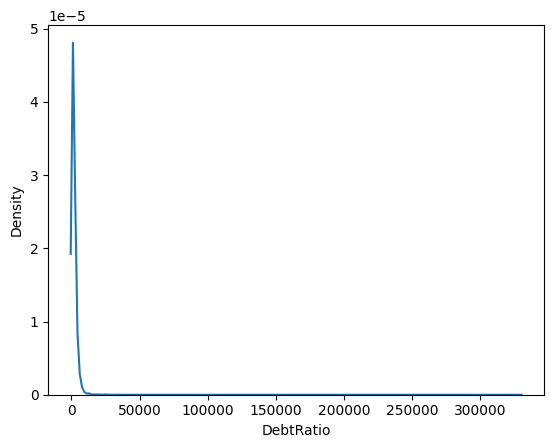

In [40]:
sns.kdeplot(util_dropped['DebtRatio'])

In [41]:
util_dropped.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Modelling 
### Xgboost

In [60]:
#import models
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
#create model
model = XGBClassifier (tree_method = 'exact')

In [49]:
#split data into train and test
x = util_dropped.drop(['SeriousDlqin2yrs'],axis=1)  #source data
y = util_dropped['SeriousDlqin2yrs']                 #target data

In [51]:
model.fit(x,y.values.ravel()) #fit model
y_pred = model.predict(x)   #predict model

In [52]:
#accuracy score
accuracy_score(y,y_pred)

0.947140462621522

In [55]:
cm = confusion_matrix(y,y_pred)

input y true and y pred, outcome, the true negative, 138375 are not true and model predicts as non-defaulters.


Text(50.722222222222214, 0.5, 'actuals')

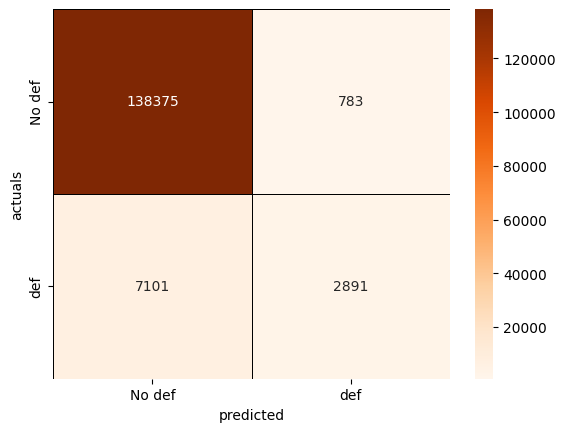

In [58]:
sns.heatmap(cm, annot=True, fmt='d',cmap="Oranges",linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,[ 'No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [61]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    139158
           1       0.79      0.29      0.42      9992

    accuracy                           0.95    149150
   macro avg       0.87      0.64      0.70    149150
weighted avg       0.94      0.95      0.94    149150



Not bad, but still try other models and see how they work.